In [1]:
import pickle
from os import listdir
from os.path import isfile, join
import sys
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold

In [2]:
mypath =  "../../Downloads/bigdata1_dataset_CS298/malware_dict/"

In [3]:
directories = listdir(mypath)

In [4]:
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]

In [5]:
print(onlyfiles)

[]


In [31]:
for directory in directories:
    pathToDir = mypath+directory+"/"
    with open(pathToDir+"top.txt",'rb') as f:
        dictionary = pickle.load(f,encoding='latin1')
        print(len(dictionary))
        

1500
921
1500
1500
1169
1500
1500
1500
336
1500
1500
1500
1500
1500
1500
1012
1500
985
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500


In [6]:
count = 0
for directory in directories:
    pathToDir = mypath+directory+"/"
    onlyfiles = [f for f in listdir(pathToDir) if isfile(join(pathToDir, f))]
    count = count+len(onlyfiles)
print(count)

17017


In [7]:
Dictionary = {}
flag = 0
for directory in directories:
    pathToDir = mypath+directory+"/"
    with open(pathToDir+"top.txt",'rb') as f:
        d = pickle.load(f,encoding='latin1')
        if flag == 0:
            Dictionary = d
            flag = 1
        else :
            for key,value in d.items():
                if key in Dictionary:
                    Dictionary[key] = Dictionary[key] + value
                else :
                    Dictionary[key] = value

In [8]:
K = 1000

In [9]:
featureVectorTopK = sorted(Dictionary.items(), key=lambda kv: kv[1],reverse=True)[:K]

In [10]:
print(featureVectorTopK)

[('\x00\x00', 397962304), ('ÿÿ', 60957433), ('@\x00', 16673201), ('\x00\x8b', 14100553), ('\x8bE', 12977827), ('\x01\x00', 12340742), ('\x00ÿ', 11313162), ('ÿ\x8b', 10244615), ('þÿ', 9242832), ('\x90\x90', 8282664), ('Eü', 7885048), ('\x00è', 7133182), ('A\x00', 6730149), ('3À', 6191782), ('\x02\x00', 6157631), ('ÿ\x15', 5878614), ('ýÿ', 5774726), ('ÿ\x00', 5633078), ('\x00\x8d', 5309969), ('\x8bÃ', 5237462), ('C\x00', 5181507), ('B\x00', 5049201), ('\x8dE', 4801579), ('\x00t', 4658477), ('\x04\x00', 4355940), ('\x00\x01', 4134143), ('j\x00', 4091690), ('H\x00', 4049111), ('\x83Ä', 3885241), ('G\x00', 3859380), ('\x00\x80', 3806885), ('üÿ', 3788328), ('^[', 3730595), ('d\x89', 3691936), ('\x8bU', 3658893), ('\x89E', 3594152), ('SV', 3502412), ('D\x00', 3428607), ('ÌÌ', 3419091), ('E\x00', 3397064), ('D$', 3341210), ('Ãè', 3333031), ('[Ã', 3295136), ('Pè', 3280709), ('\x08\x00', 3236913), ('U\x8b', 3205595), ('\x85À', 3178502), ('\x8bÆ', 3175185), ('ü\x8b', 3115431), ('\x8bØ', 3101734),

In [11]:
dataset = []
for directory in directories:
    pathToDir = mypath+directory+"/"
    fileName = [pathToDir+f for f in listdir(pathToDir) if isfile(join(pathToDir, f))]
    for filePath in fileName:
        dictionaryOfNgram = {}
        with open(filePath,"rb") as f:
            dictionaryOfNgram = pickle.load(f,encoding='latin1')
        vectorForSample = []
        for ngram_tuple in featureVectorTopK:
            if (ngram_tuple[0] in dictionaryOfNgram.keys()):
                vectorForSample.append(dictionaryOfNgram[ngram_tuple[0]])
            else:
                vectorForSample.append(0)
        sumOfRow = sum(vectorForSample)
        for i in range(0,len(vectorForSample)):
            vectorForSample[i] = float(vectorForSample[i]) / sumOfRow
        vectorForSample = [directory] + vectorForSample
        dataset.append(vectorForSample)

In [12]:
print(len(dataset))

17017


In [13]:
print(dataset[0])

['vobfus', 0.1612168643951341, 0.14266550625249477, 0.058179938358450194, 0.008559145132476983, 0.0, 0.004410446345022543, 0.0072634947225148705, 0.013165902145675604, 0.020985610428022692, 0.0, 0.011529979910874956, 0.0, 0.0044562521675969614, 0.0, 0.003841145407311918, 0.04986945340566291, 0.01538421269606528, 0.005882776356343125, 0.029322270136566787, 0.0, 0.00946217420608694, 0.004652562835773038, 0.0, 0.0, 0.0, 0.0, 0.004966659904854763, 0.0, 0.0024080775296265516, 0.0, 0.0, 0.014513902067151335, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.003068990112486013, 0.0, 0.0, 0.0, 0.0, 0.0, 0.004266485188360086, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0034027182483853447, 0.0, 0.0, 0.0, 0.0, 0.0041486987874544395, 0.0, 0.003729902695345474, 0.0, 0.0, 0.0, 0.0, 0.002159417349936853, 0.0, 0.0037102716285278663, 0.0, 0.010083824655311185, 0.0, 0.007786989837651077, 0.0, 0.0, 0.0, 0.02820984301690235, 0.0, 0.0, 0.007512154902204569, 0.0017995144582807112, 0.008539514065659375, 0.013270601168702845, 0.0, 0.0, 0.0160

In [14]:
print(dataset)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [15]:
dataset_Tmp = pd.DataFrame(dataset,columns=["Family Name"]+[i for i in range(1,K+1)])
dataset_Tmp.to_csv("../dataset/bigdata1/top1000_bigdata1.csv",sep="\t")

In [17]:
dataset_dataframe = pd.read_csv("../dataset/bigdata1/top1000_bigdata1.csv",sep="\t")
dataset_dataframe.head()

,Unnamed: 0,Family Name,1,2,3,4,5,6,7,8,...,991,992,993,994,995,996,997,998,999,1000
0,0,vobfus,0.161217,0.142666,0.058180,0.008559,0.000000,0.004410,0.007263,0.013166,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,vobfus,0.335831,0.111819,0.023257,0.002638,0.003637,0.007130,0.008142,0.016115,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,vobfus,0.215399,0.103113,0.067630,0.014031,0.005303,0.005638,0.013526,0.011528,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,vobfus,0.259472,0.080973,0.059598,0.010809,0.009412,0.008873,0.011053,0.013322,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,vobfus,0.222228,0.120731,0.012010,0.000000,0.004476,0.003771,0.005539,0.013656,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
dataset = np.array(dataset_dataframe.iloc[:,2:])

In [19]:
y = np.array(dataset_dataframe.loc[:,"Family Name"])

In [20]:
TopFamilyName = directories
topfam = set(TopFamilyName) 
label = []
for familyname in y:
    if familyname in topfam:
        for name_index in range(0,len(TopFamilyName)):
            if familyname == TopFamilyName[name_index]:
                label.append(name_index)
    else :
        label.append(len(TopFamilyName))
label = np.array(label)

In [21]:
avg_scores_knn = [0 for i in range(0,10)]
n_itr = 5
for itr in range(0,n_itr):
    # Dividing the dataset into various sub-dataset
    skf = StratifiedKFold(n_splits=10,shuffle=True)
    subDatasetIndex = []
    for train_index, test_index in skf.split(dataset,label):
        subDatasetIndex.append(test_index)
    # Verifying the whether the total is equal to total dataset
    sum = 0;
    for elem in subDatasetIndex:
        print(len(elem))
        sum = sum+len(elem)

    MeanScoreForAll = []
    sizeOfEachDataset = []
    for i in range(1,11):
        X = []
        Y = []
        tmp_sizeOfEachDataset_sum = 0;
        for j in range (0,i):
            tmp_sizeOfEachDataset_sum = tmp_sizeOfEachDataset_sum + len(subDatasetIndex[j])
            for rowIndex in subDatasetIndex[j]:
                X.append(dataset[rowIndex])
                Y.append(label[rowIndex])
        sizeOfEachDataset.append(tmp_sizeOfEachDataset_sum)
        X = np.array(X)
        Y = np.array(Y)
        mean_accuracy_array = []
        k_range = range(1, 2)
        k_scores = []
        # 1. we will loop through reasonable values of k
        for k in k_range:
            # 2. run KNeighborsClassifier with k neighbours
            knn = KNeighborsClassifier(n_neighbors=k)
            # 3. obtain cross_val_score for KNeighborsClassifier with k neighbours
            cv = StratifiedKFold(n_splits=5,shuffle=True)
            scores = cross_val_score(knn, X, Y, cv=cv, scoring='accuracy')
            # 4. append mean of scores for k neighbors to k_scores list
            k_scores.append(scores.mean())
        print("For i = " + str(i))
        print("Scores For K ranging from 1 to 30 \n" + str(k_scores))
        highestAccuracy_k = (k_scores.index(max(k_scores))+1)
        print("K with highest accuracy and its accuracy : " + str(highestAccuracy_k) +" , " + str(k_scores[highestAccuracy_k-1]))
        mean_accuracy_array.append(k_scores[highestAccuracy_k-1])
        mean = np.mean(mean_accuracy_array)
        MeanScoreForAll.append(mean)
        print("Mean Accuracy : " + str(mean))
        print("\n\n")
    for i in range(0,len(MeanScoreForAll)):
        avg_scores_knn[i] = avg_scores_knn[i]+MeanScoreForAll[i]

1717
1700
1700
1700
1700
1700
1700
1700
1700
1700
For i = 1
Scores For K ranging from 1 to 30 
[0.7677871148459383]
K with highest accuracy and its accuracy : 1 , 0.7677871148459383
Mean Accuracy : 0.7677871148459383



For i = 2
Scores For K ranging from 1 to 30 
[0.8139167862266857]
K with highest accuracy and its accuracy : 1 , 0.8139167862266857
Mean Accuracy : 0.8139167862266857



For i = 3
Scores For K ranging from 1 to 30 
[0.8363870138219223]
K with highest accuracy and its accuracy : 1 , 0.8363870138219223
Mean Accuracy : 0.8363870138219223



For i = 4
Scores For K ranging from 1 to 30 
[0.8489342774146695]
K with highest accuracy and its accuracy : 1 , 0.8489342774146695
Mean Accuracy : 0.8489342774146695



For i = 5
Scores For K ranging from 1 to 30 
[0.8581654047757716]
K with highest accuracy and its accuracy : 1 , 0.8581654047757716
Mean Accuracy : 0.8581654047757716



For i = 6
Scores For K ranging from 1 to 30 
[0.8604156538648517]
K with highest accuracy and its ac

For i = 8
Scores For K ranging from 1 to 30 
[0.8717843441724515]
K with highest accuracy and its accuracy : 1 , 0.8717843441724515
Mean Accuracy : 0.8717843441724515



For i = 9
Scores For K ranging from 1 to 30 
[0.8772545408587007]
K with highest accuracy and its accuracy : 1 , 0.8772545408587007
Mean Accuracy : 0.8772545408587007



For i = 10
Scores For K ranging from 1 to 30 
[0.8838770851624232]
K with highest accuracy and its accuracy : 1 , 0.8838770851624232
Mean Accuracy : 0.8838770851624232





In [24]:
for score in avg_scores_knn:
    print((score*100)/5)

75.496918767507
80.56542324246772
82.81761491481839
84.43663761801017
85.5719044845661
86.16183762761302
86.79126288813399
87.4190080379978
87.82124724659661
88.41044776119402


In [25]:
tmp = avg_scores_knn
for i in range(0,len(avg_scores_knn)):
    avg_scores_knn[i] = avg_scores_knn[i] / n_itr
print(avg_scores_knn)

[0.7549691876750699, 0.8056542324246772, 0.8281761491481839, 0.8443663761801018, 0.8557190448456611, 0.8616183762761302, 0.8679126288813398, 0.874190080379978, 0.8782124724659661, 0.8841044776119402]


In [26]:
with open("../dataset/bigdata2/result_knn/accuracyValueForEveryExecution.txt","a+") as f:
    f.write("Knn accuracy for testsize : 0.2\r\n")
    f.write(str(avg_scores_knn)+"\r\n")

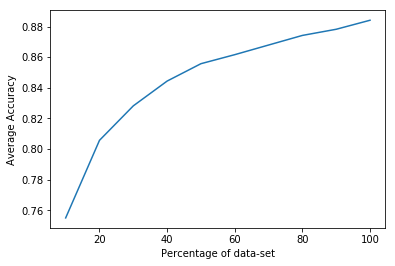

In [27]:
x_axis = [10*i for i in range(1,11)]
y_axis = avg_scores_knn
import matplotlib.pyplot as plt
plt.plot(x_axis,y_axis)
plt.xlabel('Percentage of data-set')
plt.ylabel('Average Accuracy')
plt.savefig('../dataset/bigdata2/result_knn/knn_bigdata1_test1.png')
plt.show()


In [35]:
plt.savefig('../dataset/bigdata1/result_knn/knn_bigdata1_test1.png')

<Figure size 432x288 with 0 Axes>

In [36]:
plt.savefig('../dataset/bigdata1/result_knn/knn_bigdata1_test1pdf.')

<Figure size 432x288 with 0 Axes>